<a href="https://colab.research.google.com/github/source-droid/Machine-Learning-based-Automatic-Covid-19-detection-using-Lung-s-Scans/blob/main/Only_My_Own_Model_Trained_on_Covid_Healthy_Tested_on_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libaries

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

## Clone Dataset

In [2]:
# Cloning Dataset on Colab
! git clone https://github.com/source-droid/This-is-splitted-for-COVID-and-NORMAL-Only.git

Cloning into 'This-is-splitted-for-COVID-and-NORMAL-Only'...
remote: Enumerating objects: 3013, done.
remote: Total 3013 (delta 0), reused 0 (delta 0), pack-reused 3013
Receiving objects: 100% (3013/3013), 1.71 GiB | 27.18 MiB/s, done.
Checking out files: 100% (3005/3005), done.


# Reading the Training images


In [3]:
# Reading Training Images For Covid and Normal
import numpy as np 
import glob 
import cv2 
path_l = glob.glob("/content/This-is-splitted-for-COVID-and-NORMAL-Only/train/Covid/*.*")
cv_img = [] 
for img in path_l:
    n = cv2.imread(img) 
    n = cv2.resize(n,(150,150)) 
    cv_img.append(n) 
arrayl = np.asarray(cv_img) 
print(arrayl.shape) 

path_2 = glob.glob("/content/This-is-splitted-for-COVID-and-NORMAL-Only/train/Normal/*.*")
cv_img = []
for img in path_2:
    n = cv2.imread(img)
    n = cv2.resize(n,(150,150))
    cv_img.append(n) 
array2 = np.asarray(cv_img) 
print(array2.shape) 


(1330, 150, 150, 3)
(1072, 150, 150, 3)


# Reading the Testing images


In [4]:
# Reading Testing Images For Covid and Normal
import numpy as np 
import glob
import cv2 

path_l = glob.glob("/content/This-is-splitted-for-COVID-and-NORMAL-Only/test/Covid/*.*") 
cv_img = [] 
for img in path_l:
    n = cv2.imread(img) 
    n = cv2.resize(n,(150,150))
    cv_img.append(n)
array3 = np.asarray(cv_img) 
print(array3.shape) 

path_2 = glob.glob("/content/This-is-splitted-for-COVID-and-NORMAL-Only/test/Normal/*.*") 
cv_img = []
for img in path_2:
    n = cv2.imread(img) 
    n = cv2.resize(n,(150,150)) 
    cv_img.append(n) 
array4 = np.asarray(cv_img)
print(array4.shape) 


(333, 150, 150, 3)
(269, 150, 150, 3)


# Concatenating Covid and Normal arrays into one variable for train and test:

In [5]:
# Concatenating Covid and Normal arrays into one variable for train and test:
Xtrain = np.concatenate((arrayl,array2))

Xtest = np.concatenate((array3,array4))

Xtrain.shape , Xtest.shape 

((2402, 150, 150, 3), (602, 150, 150, 3))

# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for training data:

In [6]:
# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for training data:

labels0 = np.zeros(len(arrayl)) 
labels1 = np.ones(len(array2)) 
print('Normal labels : ',labels0 ,'Covid labels : ', labels1) 
len(labels0) , len(labels1) 


Normal labels :  [0. 0. 0. ... 0. 0. 0.] Covid labels :  [1. 1. 1. ... 1. 1. 1.]


(1330, 1072)

# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for testing data:

In [7]:
# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for testing data:

labels0s = np.zeros(len(array3)) 
labels1s = np.ones(len(array4)) 
print('Normal labels : ',labels0s ,'Covid labels : ', labels1s) 
len(labels0s) , len(labels1s) 

Normal labels :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

(333, 269)

# Concatenating the labels for Covid and Normal for training and testing:

In [8]:
# Concatenating the labels for Covid and Normal for training and testing:
ytrain = np.concatenate((labels0,labels1)) 
ytest = np.concatenate((labels0s,labels1s)) 
ytrain.shape, ytest.shape 


((2402,), (602,))

# Splitting the dataset for validation data:

In [9]:
# Splitting the dataset for validation data:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(Xtrain,ytrain,test_size = 0.2, shuffle = True) 
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape 


((1921, 150, 150, 3), (481, 150, 150, 3), (1921,), (481,))

# Normalizing the data from 0 to 255 to 0 to 1:

In [10]:
# Normalizing the data from 0 to 255 to 0 to 1:
X_train_norm = X_train/255 
X_valid_norm = X_valid/255
Xtest_norm = Xtest/255 


## Building the Model

In [11]:
# Model With Dropout Layer


model = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
model.add(Conv2D(32,(5,5), padding = 'SAME', activation = 'relu', input_shape = (150,150,3)))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
model.add(Conv2D(64,(5,5), padding = 'SAME', activation = 'relu'))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model.add(Flatten())

# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

## Compile The Model

In [12]:
# compile model
from tensorflow.keras.optimizers import Adam # Adam is optimizer
# Loss function definition
model.compile(Adam(lr = 0.001),loss = 'binary_crossentropy', metrics = ['accuracy'])

## Train the Model

In [13]:
# train the model
model_history = model.fit(X_train_norm,y_train,epochs = 30,validation_data=(X_valid_norm,y_valid),verbose = 1)

Epoch 1/30
61/61 [==============================] - 113s 2s/step - loss: 1.5842 - accuracy: 0.7796 - val_loss: 0.3206 - val_accuracy: 0.9335
Epoch 2/30
61/61 [==============================] - 111s 2s/step - loss: 0.1025 - accuracy: 0.9694 - val_loss: 0.1091 - val_accuracy: 0.9709
Epoch 3/30
61/61 [==============================] - 111s 2s/step - loss: 0.0911 - accuracy: 0.9708 - val_loss: 0.0858 - val_accuracy: 0.9771
Epoch 4/30
61/61 [==============================] - 111s 2s/step - loss: 0.0898 - accuracy: 0.9687 - val_loss: 0.0781 - val_accuracy: 0.9771
Epoch 5/30
61/61 [==============================] - 111s 2s/step - loss: 0.0966 - accuracy: 0.9680 - val_loss: 0.0578 - val_accuracy: 0.9875
Epoch 6/30
61/61 [==============================] - 112s 2s/step - loss: 0.0472 - accuracy: 0.9830 - val_loss: 0.0432 - val_accuracy: 0.9875
Epoch 7/30
61/61 [==============================] - 112s 2s/step - loss: 0.0343 - accuracy: 0.9850 - val_loss: 0.0421 - val_accuracy: 0.9875
Epoch 8/30
61

# Evaluating the model

In [14]:
# Evaluating the model:
model.evaluate(Xtest_norm,ytest,verbose= 1)

19/19 [==============================] - 7s 391ms/step - loss: 0.0630 - accuracy: 0.9850


[0.06298761814832687, 0.985049843788147]

# Plot performance metrics

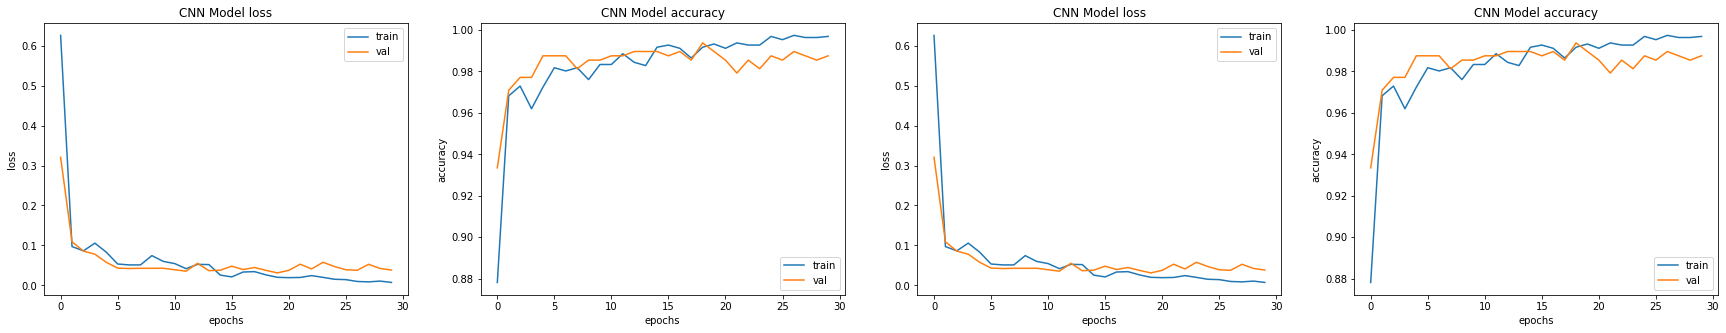

In [17]:
# plot the model accuracy and loss for the training and the validating set.
# CNN Model
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 4, figsize=(30, 5))
ax = ax.ravel()

for i, met in enumerate(['loss', 'accuracy', 'loss', 'accuracy']):
    ax[i].plot(model_history.history[met])
    ax[i].plot(model_history.history['val_' + met])
    ax[i].set_title('CNN Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

# Confusion Matrix

19/19 [==============================] - 8s 392ms/step


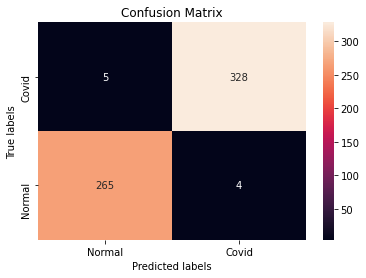

In [40]:
pred  = model.predict(Xtest_norm,verbose= 1)

pred_normalized = []
for i in range(len(pred)):
  if(pred[i]<=0.5):
    pred_normalized.append(1)
  else:
    pred_normalized.append(0)

import seaborn as sns

cm = confusion_matrix(ytest, pred_normalized)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'Covid']); ax.yaxis.set_ticklabels(['Covid', 'Normal']);


## Saving The Model

In [39]:
model_save_name = 'model.h5'
path = F"/content/{model_save_name}" 
model.save(path)

## Testing This model on Viral Pneumonia

In [41]:
# Cloning dataset on Colab
! git clone https://github.com/source-droid/Covid-19-CXR-Dataset.git

Cloning into 'Covid-19-CXR-Dataset'...
remote: Enumerating objects: 4366, done.
remote: Total 4366 (delta 0), reused 0 (delta 0), pack-reused 4366
Receiving objects: 100% (4366/4366), 2.82 GiB | 25.09 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Checking out files: 100% (4350/4350), done.


In [42]:
# Reading Testing Images Pneumonia
import numpy as np 
import glob
import cv2 

path_l = glob.glob("/content/Covid-19-CXR-Dataset/train/Viral Pneumonia/*.*") 
cv_img = [] 
for img in path_l:
    n = cv2.imread(img) 
    n = cv2.resize(n,(150,150))
    cv_img.append(n)
Pneumonia = np.asarray(cv_img) 
print(Pneumonia.shape) 
 

(1076, 150, 150, 3)


In [43]:
# Normalizing the data from 0 to 255 to 0 to 1:
Pneumonia = Pneumonia/255


In [44]:
# Creating labels 
labels0 = np.zeros(len(Pneumonia))
for i in range(len(Pneumonia)):
  labels0[i] = 2

labels0

array([2., 2., 2., ..., 2., 2., 2.])

34/34 [==============================] - 13s 387ms/step


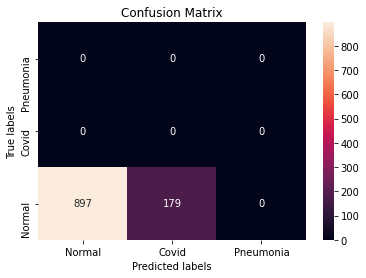

In [45]:
# plotting Confusion Matrix For Pneumonia

pred  = model.predict(Pneumonia,verbose= 1)

pred_normalized = []
for i in range(len(pred)):
  if(pred[i]<=0.5):
    pred_normalized.append(1)
  else:
    pred_normalized.append(0)

import seaborn as sns

cm = confusion_matrix(labels0, pred_normalized)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'Covid', 'Pneumonia']); ax.yaxis.set_ticklabels(['Pneumonia','Covid', 'Normal']);
